In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Dataset/iot23_combined_new.csv'

In [3]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score


import tensorflow as tf
from tensorflow import data
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import mae
from tensorflow.keras import layers
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split



In [4]:
import pandas as pd
df = pd.read_csv(file_path)

In [5]:
df['label'].unique()

array(['PartOfAHorizontalPortScan', 'Okiru', 'DDoS', 'C&C-HeartBeat',
       'Benign', 'C&C-Torii', 'C&C', 'C&C-FileDownload', 'Okiru-Attack',
       'Attack', 'FileDownload', 'C&C-HeartBeat-FileDownload',
       'C&C-Mirai'], dtype=object)

In [6]:
df.head(5)

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,0.000003,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,0.000002,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [7]:
df.columns

Index(['Unnamed: 0', 'ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h',
       'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.iloc[5]

ts                1536227023.384702
uid              CTQSiF4gOLgSBkBIOa
id.orig_h           192.168.100.111
id.orig_p                   17832.0
id.resp_h            156.95.242.221
id.resp_p                   37215.0
proto                           tcp
service                           -
duration                   0.000002
orig_bytes                        0
resp_bytes                        0
conn_state                       S0
local_orig                        -
local_resp                        -
missed_bytes                    0.0
history                           S
orig_pkts                       2.0
orig_ip_bytes                  80.0
resp_pkts                       0.0
resp_ip_bytes                   0.0
label                         Okiru
Name: 5, dtype: object

In [10]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: count, dtype: int64

In [11]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label'],
      dtype='object')

In [12]:
df['local_orig'].value_counts()

local_orig
-    6046623
Name: count, dtype: int64

In [13]:
df['local_resp'].value_counts()

local_resp
-    6046623
Name: count, dtype: int64

# **Lets Change the column names to more explainable ones**

In [14]:
df.columns = [
    'timestamp',
    'unique_identifier',
    'origin_ip_address',
    'origin_port',
    'destination_ip_address',
    'destination_port',
    'network_protocol',
    'network_service',
    'connection_duration',
    'bytes_sent_by_origin',
    'bytes_sent_by_destination',
    'connection_state',
    'is_source_local',
    'is_destination_local',
    'missed_bytes_count',
    'connection_history',
    'packets_sent_by_source',
    'ip_bytes_sent_by_source',
    'packets_sent_by_destination',
    'ip_bytes_sent_by_destination',
    'label'
]


In [15]:
df['origin_ip_address'].value_counts()

origin_ip_address
192.168.1.197      1004274
192.168.1.198       999940
192.168.100.111     999711
192.168.1.195       522846
192.168.1.194       499990
                    ...   
120.80.201.14            1
84.63.59.168             1
179.86.71.177            1
123.60.157.103           1
62.55.151.88             1
Name: count, Length: 1494, dtype: int64

In [16]:
df['connection_state'].value_counts()

connection_state
S0        5514038
OTH        515339
SF          11653
REJ          2488
S3           2484
RSTR          334
SH            105
RSTO          100
RSTOS0         44
S1             16
SHR            14
S2              6
RSTRH           2
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6046623 entries, 0 to 6046622
Data columns (total 21 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     float64
 1   unique_identifier             object 
 2   origin_ip_address             object 
 3   origin_port                   float64
 4   destination_ip_address        object 
 5   destination_port              float64
 6   network_protocol              object 
 7   network_service               object 
 8   connection_duration           object 
 9   bytes_sent_by_origin          object 
 10  bytes_sent_by_destination     object 
 11  connection_state              object 
 12  is_source_local               object 
 13  is_destination_local          object 
 14  missed_bytes_count            float64
 15  connection_history            object 
 16  packets_sent_by_source        float64
 17  ip_bytes_sent_by_source       float64
 18  packets_sent_by_destin

*<h3>Checking For Nulls</h3>*

In [18]:
df.replace("-", np.NaN, inplace=True)

In [19]:
df.isnull().sum()/len(df) *100

timestamp                         0.000000
unique_identifier                 0.000000
origin_ip_address                 0.000000
origin_port                       0.000000
destination_ip_address            0.000000
destination_port                  0.000000
network_protocol                  0.000000
network_service                  99.867777
connection_duration              62.413813
bytes_sent_by_origin             62.413813
bytes_sent_by_destination        62.413813
connection_state                  0.000000
is_source_local                 100.000000
is_destination_local            100.000000
missed_bytes_count                0.000000
connection_history                0.026626
packets_sent_by_source            0.000000
ip_bytes_sent_by_source           0.000000
packets_sent_by_destination       0.000000
ip_bytes_sent_by_destination      0.000000
label                             0.000000
dtype: float64

In [20]:
cols_to_drop =['network_service','is_source_local',
'is_destination_local',"unique_identifier", "bytes_sent_by_destination","bytes_sent_by_origin"]
df = df.drop(cols_to_drop, axis = 1)

In [21]:
df = df.dropna(subset=['connection_history'])

In [22]:
df.isnull().sum()/len(df) *100

timestamp                        0.000000
origin_ip_address                0.000000
origin_port                      0.000000
destination_ip_address           0.000000
destination_port                 0.000000
network_protocol                 0.000000
connection_duration             62.417748
connection_state                 0.000000
missed_bytes_count               0.000000
connection_history               0.000000
packets_sent_by_source           0.000000
ip_bytes_sent_by_source          0.000000
packets_sent_by_destination      0.000000
ip_bytes_sent_by_destination     0.000000
label                            0.000000
dtype: float64

In [23]:
df["connection_duration"]

0             0.000003
1             0.000002
2             0.000002
3             0.000002
4             0.000002
              ...     
6046614         0.0001
6046615        9.9e-05
6046616       3.799446
6046617    4537.403134
6046618      90.034713
Name: connection_duration, Length: 6045013, dtype: object

In [24]:
df["connection_history"]

0                  S
1                  S
2                  S
3                  S
4                  S
             ...    
6046614            D
6046615            D
6046616            D
6046617    ShDadAttt
6046618            D
Name: connection_history, Length: 6045013, dtype: object

In [25]:
from sklearn.impute import SimpleImputer

# Create the SimpleImputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer on the columns to impute
imputer.fit(df[['connection_duration']])

# Transform the column
df['connection_duration'] = imputer.transform(df[['connection_duration']])



In [26]:
df.head(5)

,timestamp,origin_ip_address,origin_port,destination_ip_address,destination_port,network_protocol,connection_duration,connection_state,missed_bytes_count,connection_history,packets_sent_by_source,ip_bytes_sent_by_source,packets_sent_by_destination,ip_bytes_sent_by_destination,label
0,1.536227e+09,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,0.000003,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


## 1. Distribution of Network Events by Label.

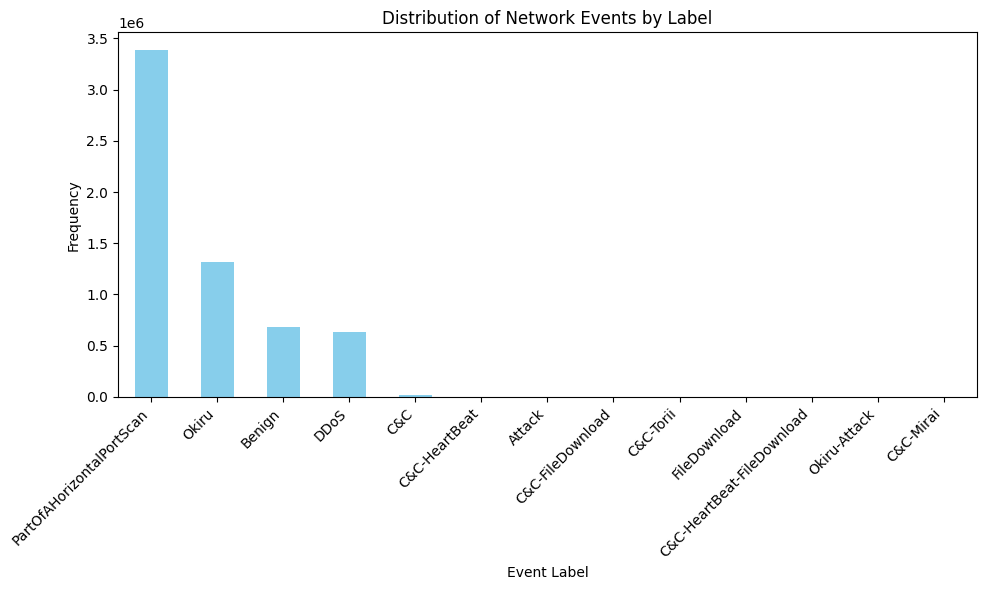

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

event_label_counts = df['label'].value_counts()

plt.figure(figsize=(10, 6))
event_label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Network Events by Label')
plt.xlabel('Event Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


## 2. Protocol Usage Frequency

In [28]:
df['network_protocol'].value_counts()

network_protocol
tcp    6026584
udp      18429
Name: count, dtype: int64

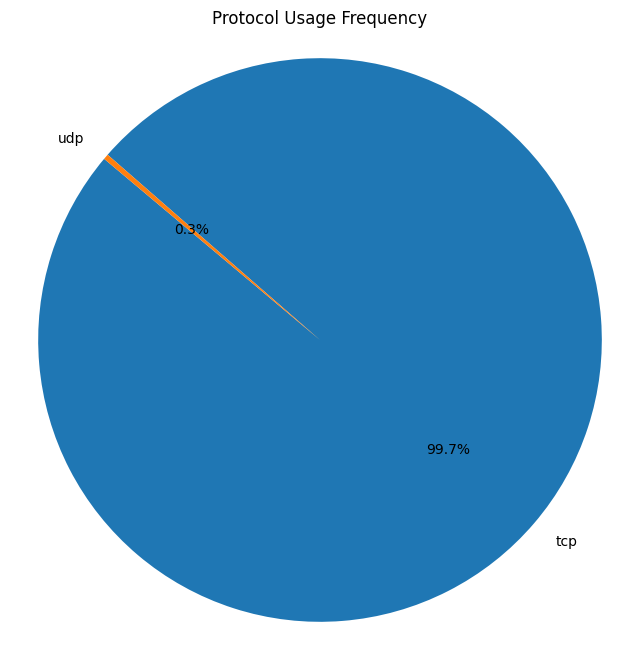

In [29]:

protocol_usage_counts = df['network_protocol'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(protocol_usage_counts, labels=protocol_usage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Protocol Usage Frequency')
plt.axis('equal')

plt.show()


From the above analysis, it's obvious tcp was used the most for the connection over 99% of connection attempts.

## 3. Connection Duration by Label
Distribution of connection_duration for network events

Summary Statistics of Connection Duration by Label:
                                count         mean           std       min  \
label                                                                        
Attack                          538.0     5.245452     27.767583  0.013494   
Benign                       687202.0     2.234315    135.814986  0.000002   
C&C                           15286.0     9.270327    429.889069  0.000002   
C&C-FileDownload                 46.0     1.769612      1.076810  0.600404   
C&C-HeartBeat                  1332.0     1.538012      1.263221  0.000005   
C&C-HeartBeat-FileDownload        8.0     1.235697      0.402674  0.856751   
C&C-Mirai                         1.0     0.329079           NaN  0.329079   
C&C-Torii                        30.0  5720.093276  13417.658850  0.986848   
DDoS                         638506.0     0.849446     13.407478  0.000001   
FileDownload                     13.0     6.692524     15.640581  0.569426   
Okiru       

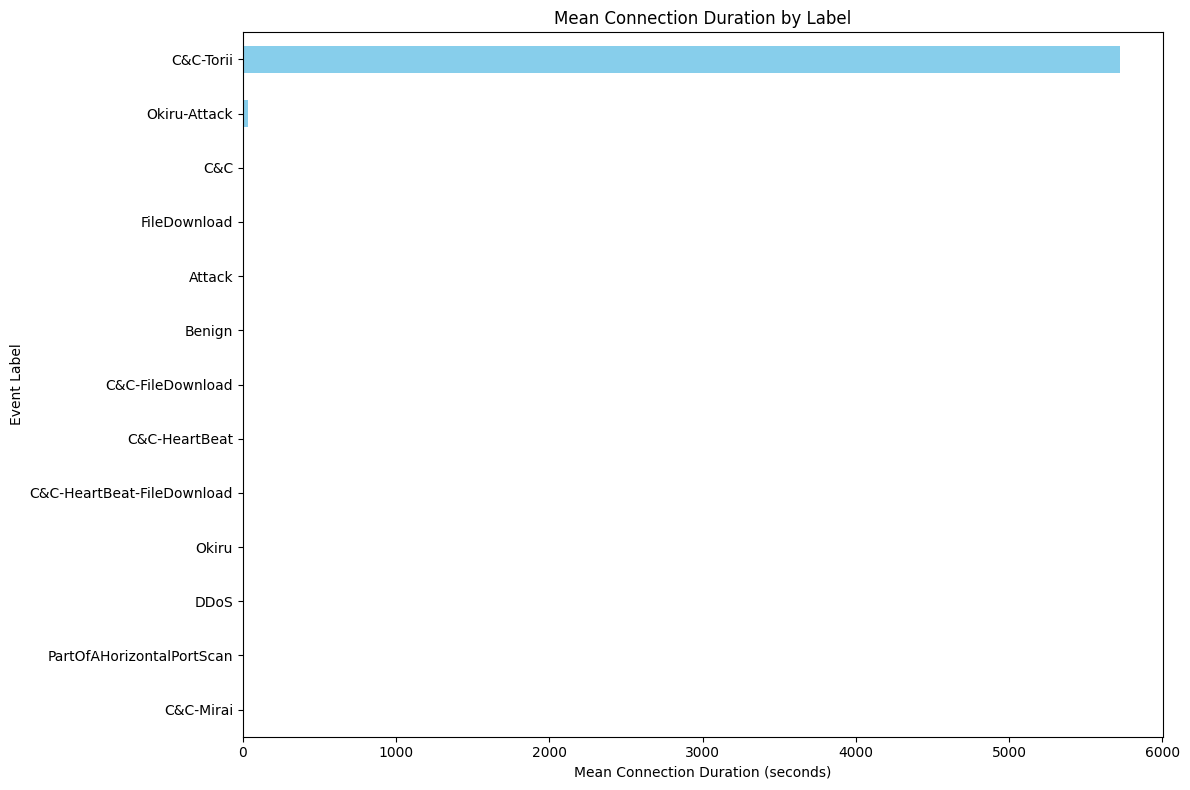

In [30]:
import pandas as pd

df['connection_duration'] = pd.to_numeric(df['connection_duration'], errors='coerce')

connection_duration_by_label = df.groupby('label')['connection_duration'].describe()

mean_connection_duration_by_label = df.groupby('label')['connection_duration'].mean()
median_connection_duration_by_label = df.groupby('label')['connection_duration'].median()

print("Summary Statistics of Connection Duration by Label:")
print(connection_duration_by_label)

# A bar chart visualization for the mean connection duration :
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
mean_connection_duration_by_label.sort_values().plot(kind='barh', color='skyblue')
plt.title('Mean Connection Duration by Label')
plt.xlabel('Mean Connection Duration (seconds)')
plt.ylabel('Event Label')
plt.tight_layout()
plt.show()


## 4. Identifying Top Communicating Pairs
Identify pairs of source_ip_address and destination_ip_address with the most connections.

In [31]:
import pandas as pd

pair_counts = df.groupby(['origin_ip_address', 'destination_ip_address']).size().reset_index(name='connections')

# Sort pairs by the number of connections, descending
top_pairs = pair_counts.sort_values(by='connections', ascending=False).head(10)

print(top_pairs)


        origin_ip_address destination_ip_address  connections
995936      192.168.1.195         162.248.88.215       499142
995931      192.168.1.195         123.59.209.185        14260
995942      192.168.1.195         185.244.25.235         6768
4986796   192.168.100.113        178.128.185.250         4112
4986791   192.168.100.113         128.185.250.50         4110
1632390     192.168.1.197         185.244.25.183         1947
4986799   192.168.100.113          192.168.100.1         1872
1658059     192.168.1.197            192.168.1.1         1681
4986794   192.168.100.113          147.231.100.5         1334
3490569   192.168.100.103          217.30.75.147         1301


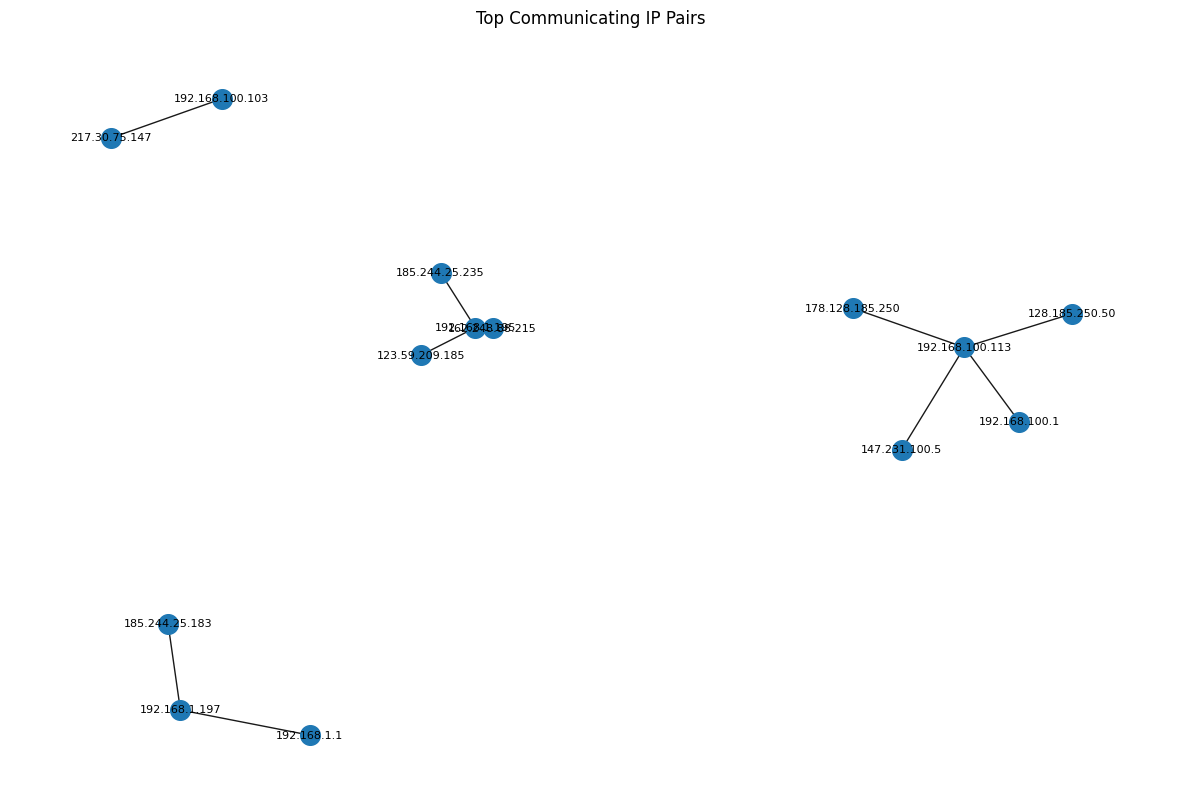

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a graph
G = nx.Graph()

# Add edges from top_pairs
# Assuming 'top_pairs' contains the top communicating IP pairs
for index, row in top_pairs.iterrows():
    G.add_edge(row['origin_ip_address'], row['destination_ip_address'], weight=row['connections'])

# Drawing the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=5, seed=42)  # For consistent layout
edges = nx.draw_networkx_edges(G, pos, alpha=0.9)
nodes = nx.draw_networkx_nodes(G, pos, node_size=200)
labels = nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Top Communicating IP Pairs')
plt.axis('off')  # Turn off the axis
plt.show()


In [33]:

for (source, destination, data) in G.edges(data=True):
    print(f"Source: {source}, Destination: {destination}, Connections: {data.get('weight', 'N/A')}")


Source: 192.168.1.195, Destination: 162.248.88.215, Connections: 499142
Source: 192.168.1.195, Destination: 123.59.209.185, Connections: 14260
Source: 192.168.1.195, Destination: 185.244.25.235, Connections: 6768
Source: 192.168.100.113, Destination: 178.128.185.250, Connections: 4112
Source: 192.168.100.113, Destination: 128.185.250.50, Connections: 4110
Source: 192.168.100.113, Destination: 192.168.100.1, Connections: 1872
Source: 192.168.100.113, Destination: 147.231.100.5, Connections: 1334
Source: 192.168.1.197, Destination: 185.244.25.183, Connections: 1947
Source: 192.168.1.197, Destination: 192.168.1.1, Connections: 1681
Source: 192.168.100.103, Destination: 217.30.75.147, Connections: 1301


## 5. Distribution of packets sent by source and destination
Examine the distribution of packets_sent_by_source and packets_sent_by_destination.

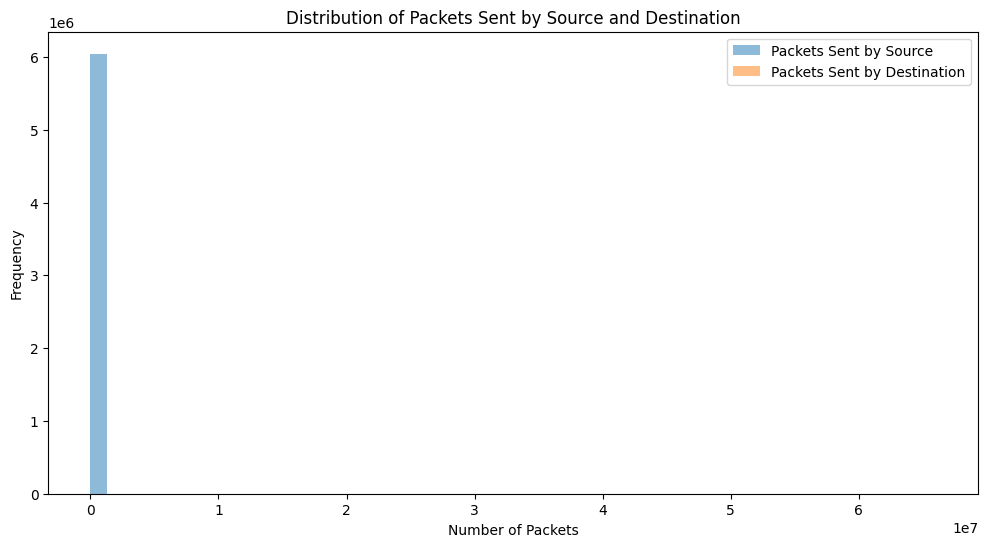

In [34]:
df['packets_sent_by_source'] = pd.to_numeric(df['packets_sent_by_source'], errors='coerce')
df['packets_sent_by_destination'] = pd.to_numeric(df['packets_sent_by_destination'], errors='coerce')

plt.figure(figsize=(12, 6))

# Plotting histograms for packets sent by source and destination
plt.hist(df['packets_sent_by_source'], bins=50, alpha=0.5, label='Packets Sent by Source')
plt.hist(df['packets_sent_by_destination'], bins=50, alpha=0.5, label='Packets Sent by Destination')

plt.xlabel('Number of Packets')
plt.ylabel('Frequency')
plt.title('Distribution of Packets Sent by Source and Destination')
plt.legend()

plt.show()


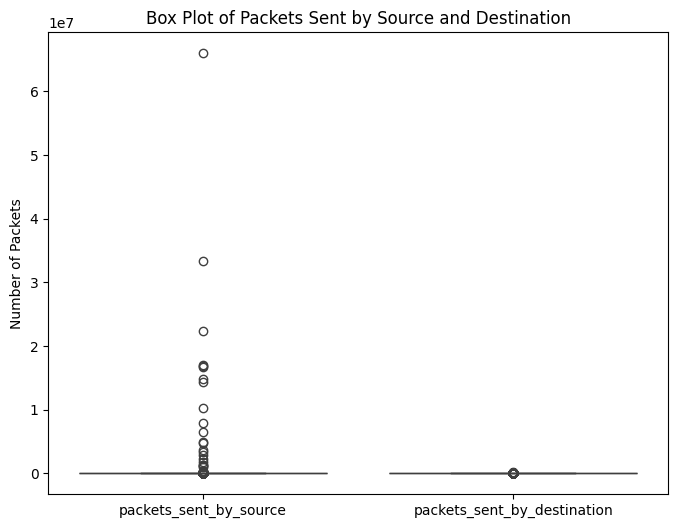

In [35]:
plt.figure(figsize=(8, 6))

# Melting the DataFrame for easier plotting with seaborn
packets_melted = df.melt(value_vars=['packets_sent_by_source', 'packets_sent_by_destination'], var_name='Type', value_name='Packets')

# Plotting with seaborn
sns.boxplot(x='Type', y='Packets', data=packets_melted)
plt.title('Box Plot of Packets Sent by Source and Destination')
plt.xlabel('')
plt.ylabel('Number of Packets')

plt.show()


## 6. Connection States Frequency
Determine the frequency of different connection_states within the dataset.


In [36]:
connection_states_freq = df['connection_state'].value_counts()

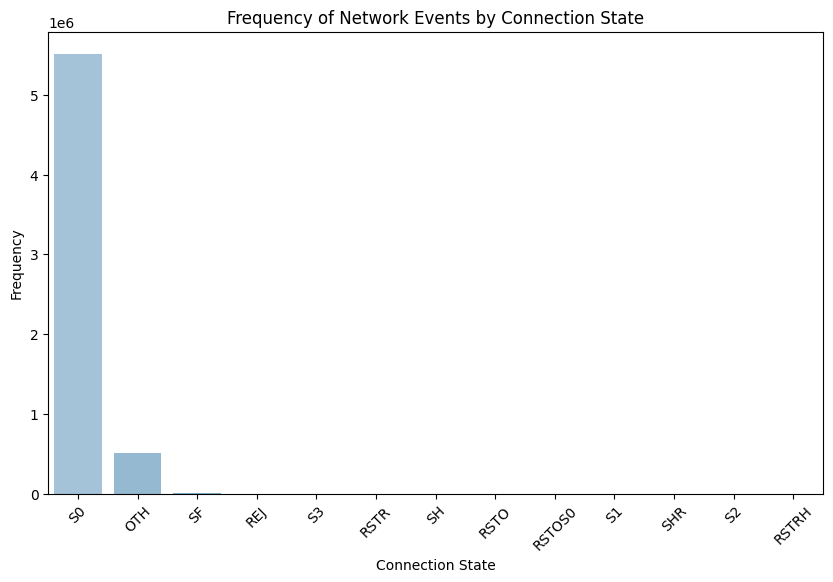

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=connection_states_freq.index, y=connection_states_freq.values, palette='Blues_d')

plt.xlabel('Connection State')
plt.ylabel('Frequency')
plt.title('Frequency of Network Events by Connection State')
plt.xticks(rotation=45)  # Rotating labels for readability

plt.show()


In [38]:
connection_states_freq

connection_state
S0        5514038
OTH        513729
SF          11653
REJ          2488
S3           2484
RSTR          334
SH            105
RSTO          100
RSTOS0         44
S1             16
SHR            14
S2              6
RSTRH           2
Name: count, dtype: int64

**MODELLING**

In [39]:
df.head()

,timestamp,origin_ip_address,origin_port,destination_ip_address,destination_port,network_protocol,connection_duration,connection_state,missed_bytes_count,connection_history,packets_sent_by_source,ip_bytes_sent_by_source,packets_sent_by_destination,ip_bytes_sent_by_destination,label
0,1.536227e+09,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,0.000003,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,0.000002,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6045013 entries, 0 to 6046618
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     float64
 1   origin_ip_address             object 
 2   origin_port                   float64
 3   destination_ip_address        object 
 4   destination_port              float64
 5   network_protocol              object 
 6   connection_duration           float64
 7   connection_state              object 
 8   missed_bytes_count            float64
 9   connection_history            object 
 10  packets_sent_by_source        float64
 11  ip_bytes_sent_by_source       float64
 12  packets_sent_by_destination   float64
 13  ip_bytes_sent_by_destination  float64
 14  label                         object 
dtypes: float64(9), object(6)
memory usage: 737.9+ MB


In [41]:
import hashlib

# Function to convert IPv4 addresses to numerical
def ipv4_to_int(ip):
    parts = ip.split('.')
    return sum(int(part) * 256 ** (3 - i) for i, part in enumerate(parts))
def ipv6_to_hash(ip):
    # Using a large prime number for modulo to get a wide distribution
    return int(hashlib.sha256(ip.encode('utf-8')).hexdigest(), 16) % (2**64)

# Apply the conversion functions to the IP address columns
df['origin_ip_numerical'] = df['origin_ip_address'].apply(lambda x: ipv4_to_int(x) if ':' not in x else ipv6_to_hash(x))
df['destination_ip_numerical'] = df['destination_ip_address'].apply(lambda x: ipv4_to_int(x) if ':' not in x else ipv6_to_hash(x))


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6045013 entries, 0 to 6046618
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     float64
 1   origin_ip_address             object 
 2   origin_port                   float64
 3   destination_ip_address        object 
 4   destination_port              float64
 5   network_protocol              object 
 6   connection_duration           float64
 7   connection_state              object 
 8   missed_bytes_count            float64
 9   connection_history            object 
 10  packets_sent_by_source        float64
 11  ip_bytes_sent_by_source       float64
 12  packets_sent_by_destination   float64
 13  ip_bytes_sent_by_destination  float64
 14  label                         object 
 15  origin_ip_numerical           uint64 
 16  destination_ip_numerical      uint64 
dtypes: float64(9), object(6), uint64(2)
memory usage: 830.2+ MB


In [43]:
df.drop(['origin_ip_address', 'destination_ip_address'], axis=1, inplace=True)

In [44]:
# doing onehotencoding for network_protocol and connection_state
cols_for_onehotencoding=["connection_state","network_protocol"]



In [45]:
subset_df = df.sample(frac=0.2, random_state=42)
subset_df.reset_index(drop=True, inplace=True)

In [46]:
# Scaling numerical columns
scaler = StandardScaler()
for col in subset_df.columns:
    if subset_df[col].dtype == "float64" or subset_df[col].dtype == "uint64":
        subset_df[col] = scaler.fit_transform(subset_df[[col]])

# Encoding categorical columns using pd.get_dummies
subset_df = pd.get_dummies(subset_df, columns=cols_for_onehotencoding,dtype=int)


In [47]:

X = subset_df.drop(["label","connection_history"], axis=1)
y = subset_df["label"]

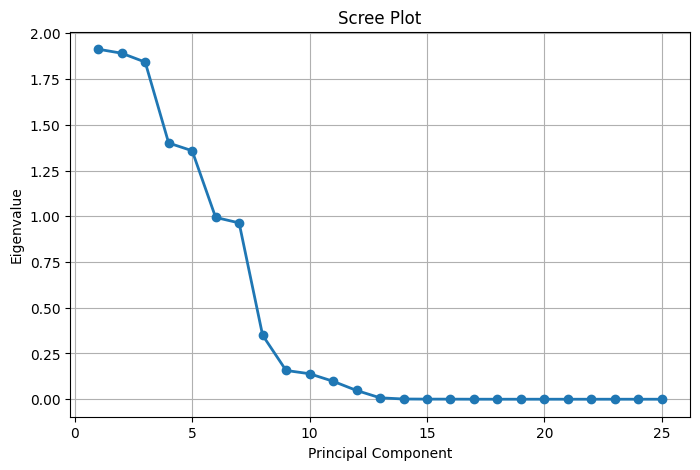

In [48]:
from sklearn.decomposition import PCA
X_p = X
# Perform PCA
pca = PCA().fit(X_p)

# Plot the Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

based o the plot the elbow point is between 5-7 components this will help us determine how we would do dimensionality reduction

In [49]:

# Reduce dimensionality
pca = PCA(n_components=0.90)  # Adjusting the number of components for the variance you want to retain
X_pca = pca.fit_transform(X)

# Inspect the results
print(f"Number of components selected: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Number of components selected: 7
Explained variance ratio: [0.17133274 0.16937999 0.16503034 0.12542942 0.12163304 0.08900421
 0.08630788]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=42)

<h2>Using Autoencoder Neural Networks</h2>

In [51]:
class AutoEncoder(Model):
    def __init__(self, input_dim, latent_dim):
        super(AutoEncoder, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=(input_dim,)),
            layers.Reshape((input_dim, 1)),  # Reshape to 3D for Conv1D
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(128, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
            layers.Conv1D(latent_dim, 3, strides=1, activation='relu', padding="same"),
            layers.BatchNormalization(),
            layers.MaxPooling1D(2, padding="same"),
        ])
        # Previously, I was using UpSampling. I am trying Transposed Convolution this time around.
        self.decoder = tf.keras.Sequential([
            layers.Conv1DTranspose(latent_dim, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Conv1DTranspose(128, 3, strides=1, activation='relu', padding="same"),
#             layers.UpSampling1D(2),
            layers.BatchNormalization(),
            layers.Flatten(),
            layers.Dense(input_dim)
        ])

    def call(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded


input_dim = X_train.shape[-1]
latent_dim = 32

model = AutoEncoder(input_dim, latent_dim)
model.build((None, input_dim))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="mae")
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 4, 32)             63264     
                                                                 
 sequential_1 (Sequential)   (None, 25)                78777     
                                                                 
Total params: 142041 (554.85 KB)
Trainable params: 140889 (550.35 KB)
Non-trainable params: 1152 (4.50 KB)
_________________________________________________________________


In [52]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 20
batch_size = 128
early_stopping = EarlyStopping(patience=10, min_delta=1e-3, monitor="val_loss", restore_best_weights=True)


history = model.fit(X_train, X_train, epochs=epochs, batch_size=batch_size,
                    validation_split=0.1, callbacks=[early_stopping])

Epoch 1/20
5951/5951 [==============================] - 298s 49ms/step - loss: 0.0204 - val_loss: 0.0262
Epoch 2/20
5951/5951 [==============================] - 272s 46ms/step - loss: 0.0070 - val_loss: 0.0386
Epoch 3/20
5951/5951 [==============================] - 269s 45ms/step - loss: 0.0062 - val_loss: 0.0258
Epoch 4/20
5951/5951 [==============================] - 274s 46ms/step - loss: 0.0061 - val_loss: 14.7755
Epoch 5/20
5951/5951 [==============================] - 272s 46ms/step - loss: 0.0054 - val_loss: 0.0857
Epoch 6/20
5951/5951 [==============================] - 272s 46ms/step - loss: 0.0055 - val_loss: 0.0069
Epoch 7/20
5951/5951 [==============================] - 266s 45ms/step - loss: 0.0051 - val_loss: 0.0543
Epoch 8/20
5951/5951 [==============================] - 267s 45ms/step - loss: 0.0054 - val_loss: 0.0995
Epoch 9/20
5951/5951 [==============================] - 271s 46ms/step - loss: 0.0050 - val_loss: 0.0105
Epoch 10/20
5951/5951 [==============================]

In [53]:
test_loss = model.evaluate(X_test, X_test)
print(f'Test loss: {test_loss}')

11335/11335 [==============================] - 66s 6ms/step - loss: 0.0145
Test loss: 0.014527578838169575


In [54]:

threshold = np.mean(test_loss) + 3 * np.std(test_loss)
reconstructed = model.predict(X_test)
reconstruction_errors = np.mean(np.square(X_test - reconstructed), axis=1)
anomalies = X_test[reconstruction_errors > threshold]

11335/11335 [==============================] - 68s 6ms/step


In [55]:
anomalies

,timestamp,origin_port,destination_port,connection_duration,missed_bytes_count,packets_sent_by_source,ip_bytes_sent_by_source,packets_sent_by_destination,ip_bytes_sent_by_destination,origin_ip_numerical,...,connection_state_RSTR,connection_state_S0,connection_state_S1,connection_state_S2,connection_state_S3,connection_state_SF,connection_state_SH,connection_state_SHR,network_protocol_tcp,network_protocol_udp
947832,-0.797963,0.763255,-0.832875,0.000202,-0.001966,-0.001981,-0.001959,-0.002234,-0.001435,-0.0035,...,0,1,0,0,0,0,0,0,0,1
258141,0.539882,-2.022854,-0.829797,-0.015120,-0.001966,-0.001937,-0.001858,-0.002234,-0.001435,-0.0035,...,0,1,0,0,0,0,0,0,0,1
23058,0.540235,0.800436,-0.634955,0.003842,-0.001966,-0.001501,-0.001235,1.011560,0.043982,-0.0035,...,0,0,0,0,0,1,0,0,1,0
1015931,-1.433799,-0.343707,1.229212,0.000202,-0.001966,-0.001981,-0.001926,-0.002234,-0.001435,-0.0035,...,0,1,0,0,0,0,0,0,0,1
25861,-0.802139,-2.022854,-0.829797,0.000202,-0.001966,-0.001981,-0.001948,-0.002234,-0.001435,-0.0035,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860798,-0.598677,0.991858,-0.815726,-0.015066,-0.001966,-0.001806,-0.001787,0.301905,0.011389,-0.0035,...,0,0,0,0,0,1,0,0,1,0
498519,-1.046267,-1.010814,-0.831688,-0.005636,-0.001966,-0.001850,-0.001849,0.200525,0.006402,-0.0035,...,0,0,0,0,0,0,0,0,1,0
156780,-0.909170,1.339495,-0.829797,0.000202,-0.001966,-0.001981,-0.001948,-0.002234,-0.001435,-0.0035,...,0,1,0,0,0,0,0,0,0,1
284603,-0.909232,0.781958,-0.831688,-0.011202,-0.001966,-0.001850,-0.001665,0.403284,0.034721,-0.0035,...,0,0,0,0,0,1,0,0,1,0


In [56]:
train_mae = model.evaluate(X_train, X_train, verbose=0)
test_mae = model.evaluate(X_test, X_test, verbose=0)

print("Training dataset error: ", train_mae)
print("Testing dataset error: ", test_mae)

Training dataset error:  0.049331605434417725
Testing dataset error:  0.014527578838169575


In [57]:
def predict(model, X):
    pred = model.predict(X, verbose=False)
    loss = mae(pred, X)
    return pred, loss

In [58]:

def evaluate_model(model, data):
    pred, loss = predict(model, data)
    if id(data) == id(anomalies):
        accuracy = np.sum(loss > threshold)/len(data)
    else:
        accuracy = np.sum(loss <= threshold)/len(data)
    return f"Accuracy: {accuracy:.2%}"

In [59]:
print("Training", evaluate_model(model, X_train))
print("Testing", evaluate_model(model, X_test))

Training Accuracy: 99.73%
Testing Accuracy: 99.73%
